# 1 - Introdução

Os dados em estudo estão relacionados com campanhas de marketing direto de uma instituição bancária portuguesa.

As campanhas de marketing foram baseadas em chamadas telefônicas. Muitas vezes, era necessário mais de um contato com o mesmo cliente, para se saber se o produto (depósito a prazo bancário) seria adquirido ou não.

Cabe entender que Depósito a Prazo é uma modalidade de investimento oferecida por instituições financeiras, onde o investidor deposita uma quantia de dinheiro por um período determinado, recebendo em troca uma taxa de juros previamente acordada.

Os depósitos a prazo possuem diversas características que os tornam atraentes para diferentes perfis de investidores. Entre as principais, destacam-se a previsibilidade dos rendimentos, a segurança proporcionada pela garantia do FGC, e a possibilidade de escolha entre diferentes prazos e taxas de juros. Além disso, os depósitos a prazo podem ser resgatados antecipadamente, embora isso possa acarretar em perda de parte dos rendimentos.

***O objetivo desse trabalho é estudar a forma de realização da preparação dos dados, sendo esta etapa fundamental para modelos de machine learnig visando garantir sua qualidade e eficácia.***

A preparação de dados é uma fase crítica no processo de aprendizado de máquina, mas é apenas uma das muitas etapas necessárias na produção de conjuntos de dados de aprendizado de máquina.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2 - Fonte dos dados

https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing


# 3 - Dicionário de Dados

Informações do Cliente:

- Age: idade do cliente (numérico)

- Job : tipo de ocupação (categórico: 'admin.', 'operário', 'empreendedor', 'empregada doméstica', 'gestão', 'aposentado', 'autônomo', 'serviços', 'estudante', 'técnico', 'desempregado', 'desconhecido')

- Marital : estado civil do cliente (categórico: 'divorciado', 'casado', 'solteiro', 'desconhecido'; nota: 'divorciado' inclui divorciados e viúvos)

- Education : nível de escolaridade (categórico: 'básico 4 anos', 'básico 6 anos', 'básico 9 anos', 'ensino médio', 'analfabeto', 'curso profissionalizante', 'graduação', 'desconhecido')

- Default: possui crédito em inadimplência? (categórico: 'não', 'sim', 'desconhecido')

- Housing: possui financiamento imobiliário? (categórico: 'não', 'sim', 'desconhecido')

- Loan: possui empréstimo pessoal? (categórico: 'não', 'sim', 'desconhecido')



Informações sobre o Último Contato da Campanha Atual:

- Contact: tipo de comunicação usada (categórico: 'celular', 'telefone fixo')
- Month: mês do último contato no ano (categórico: 'jan', 'fev', 'mar', ..., 'nov', 'dez')
- Day_of_week: dia da semana do último contato (categórico: 'seg', 'ter', 'qua', 'qui', 'sex')
- Duration: duração do último contato em segundos (numérico). Nota importante: esta variável afeta fortemente o resultado (por exemplo, se duração = 0, então y = 'não'). No entanto, a duração não é conhecida antes da ligação ser realizada e, ao final da ligação, o resultado (y) já é conhecido. Portanto, essa variável deve ser usada apenas para benchmark e descartada se o objetivo for criar um modelo preditivo realista.


Outras Informações:
- Campaign: número de contatos realizados durante esta campanha para este cliente (numérico, inclui o último contato)
- Pdays: número de dias desde o último contato com o cliente em uma campanha anterior (numérico; 999 significa que o cliente não foi contatado anteriormente)
- Previous: número de contatos realizados antes desta campanha para este cliente (numérico)
- Poutcome: resultado da campanha de marketing anterior (categórico: 'fracasso', 'inexistente', 'sucesso')


Indicadores de Contexto Social e Econômico:
- Emp.var.rate: indicador trimestral da variação no emprego (numérico)
- Cons.price.idx: indicador mensal da inflação (numérico)
- Cons.conf.idx: indicador mensal da confiança do consumidor (numérico)
- Euribor 3m: taxa Euribor de 3 meses - indicador diário (numérico)
- Nr.employed: número total de empregados - indicador trimestral (numérico)


Variável Alvo (target):
- y: o cliente assinou um depósito a prazo? (binário: 'sim', 'não')

# 4 -  Análise Exploratória dos Dados

In [ ]:
# Importando bibliotecas

import numpy             as np
import matplotlib.pyplot as plt
import pandas            as pd
import seaborn           as sns
import plotly.express     as px

from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [ ]:
# Ler Conjunto de Dados

df = pd.read_csv("/content/drive/MyDrive/PodAcademy/Tarefas/A0010_Bank_Marketing/bank-additional-full.csv", sep=";", encoding="ISO-8859-1" )

#verificando a quantidade de linhas e colunas

print(f' Quantidade de linhas: {df.shape[0]} \n Quantidade de colunas: {df.shape[1]}')

 Quantidade de linhas: 41188 
 Quantidade de colunas: 21


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
# Metadados

# Construindo função para obter metadados
def metadados(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata


In [ ]:
# Obtendo metadados

metadados_df = metadados(df)
metadados_df.head(100)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,y,object,0,0.0,2
1,marital,object,0,0.0,4
2,education,object,0,0.0,8
3,default,object,0,0.0,3
4,housing,object,0,0.0,3
5,loan,object,0,0.0,3
6,contact,object,0,0.0,2
7,month,object,0,0.0,10
8,day_of_week,object,0,0.0,5
9,job,object,0,0.0,12


Pela análise do Metadados
- não há valores nulos a serem tratados

In [ ]:
# Análise estatística para os dados numéricos

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


- O cliente com menor idade tem 17 anos e o mais velho tem 80 anos;

- a média da idade dos clientes é de 40 anos;

In [ ]:
# Análise das variáveis qualitativas

df.describe(include=["object"]).T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [ ]:
# Visualizando a proporção da variável target
df['y'].value_counts(1)

,proportion
y,
no,0.887346
yes,0.112654


Pela análise entre a proporção podemos perceber que **os dados encontram-se desbalanceados.**

- Aproximadamente 88% dos clientes responderam "não" para o produto e

- somente 11% aderiram ao produto.

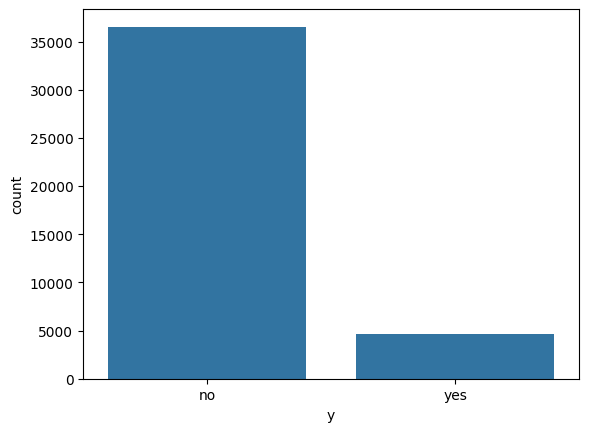

In [ ]:
sns.countplot(data=df, x='y');


#5 - PREPARAÇÃO DOS DADOS

In [ ]:
# Mapeamento target (0 = no, 1 = yes)
df_target = {'no': 0, 'yes': 1}

# Converter nomes para números
df['y'] = df['y'].map(df_target)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
# Verificando a quantidade de valores nulos por coluna
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


- Não será necessário tratamento de dados nulos

In [ ]:
# Separando variáveis explicativas e variável target
abt = df.drop(columns=['y'])
target = df.y

#Validando os dados
abt.shape

(41188, 20)

In [ ]:
target.head()

,y
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Reservar 80% para treino e 20% para teste.

from sklearn.model_selection import train_test_split

# Dividindo o DataFrame em treino e teste
X_train, X_test, y_train, y_test = train_test_split(abt,target,test_size=0.2,random_state=42, stratify= target) #Stratify vai permitir que a proporção do target (88% para 0 e 11% para 1) seja mantida no treino e no teste

# Visualizando o 'shape' dos dados de treino e teste
print(f"Número de linhas e colunas dos dados de treino, respectivamente: {X_train.shape}")

print(f"Número de linhas e colunas dos dados de teste, respectivamente: {X_test.shape}")


Número de linhas e colunas dos dados de treino, respectivamente: (32950, 20)
Número de linhas e colunas dos dados de teste, respectivamente: (8238, 20)


In [ ]:
pd.Series(y_train).value_counts(1)

,proportion
y,
0,0.887344
1,0.112656


In [ ]:
pd.Series(y_test).value_counts(1)

,proportion
y,
0,0.887351
1,0.112649


Lembrando que os dados estão desbalanceados.
Quando esse problema ocorre, o desempenho de um modelo pode ficar prejudicado.

Assim, em momento posterior devemos fazer o tratamento.


### Padronização dos dados

Temos Features com diferentes escalas.

É importantes padronizarmos os dados.

A padronização é a transformação das variáveis do conjunto de dados para uma escala padrão, garantindo que cada característica tenho uma escala similar.

Assegura que todas as características contribuam igualmente para o resultado e o algoritmo consegue fazer suas análises de forma correta sem dar prioridade a uma informação que pode não ser prioritária.


In [ ]:
#Padronização dos dados

from sklearn.preprocessing import StandardScaler  #A classe StandardScaler escala os dados subtraindo a média de cada feature e dividindo pelo desvio padrão.

# Instanciando o scaler
scaler = StandardScaler()

# Selecionando colunas numéricas do conjunto de treino e teste
numeric_cols_train = X_train.select_dtypes(exclude=['object']).columns
numeric_cols_test = X_test.select_dtypes(exclude=['object']).columns

# Ajustando e transformando os dados de treino
X_train_scaled = X_train.copy()  # Copiar para preservar os dados originais
X_train_scaled[numeric_cols_train] = scaler.fit_transform(X_train[numeric_cols_train])

# Aplicando a transformação ao conjunto de teste
X_test_scaled = X_test.copy()  # Copiar para preservar os dados originais
X_test_scaled[numeric_cols_test] = scaler.transform(X_test[numeric_cols_test])


print(f'Colunas numéricas: {numeric_cols_train}')

Colunas numéricas: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [ ]:
#Validando os dados
X_test_scaled.shape, X_train_scaled.shape

((8238, 20), (32950, 20))

In [ ]:
X_train_scaled.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
25611,0.863739,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,-0.120196,0.522981,0.196584,-0.350127,nonexistent,-0.114858,-0.648967,-0.322269,0.288964,0.398990
26010,-0.289722,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,-0.216732,-0.203688,0.196584,1.653813,failure,-0.114858,-0.648967,-0.322269,0.288964,0.398990
40194,3.651268,retired,married,basic.4y,no,no,no,cellular,jul,mon,3.436173,-0.567023,0.196584,-0.350127,nonexistent,-1.133161,1.103451,0.045048,-1.583296,-2.420139
297,-0.385843,admin.,married,university.degree,no,yes,no,telephone,may,mon,-0.533368,-0.203688,0.196584,-0.350127,nonexistent,0.648868,0.721890,0.887717,0.713535,0.332723
36344,1.824956,retired,divorced,university.degree,no,no,no,cellular,jun,tue,0.424264,-0.203688,0.196584,-0.350127,nonexistent,-1.896888,-1.058152,-0.062987,-1.357472,-1.252175


### Tratamento das variáveis categóricas (dummyficação)


Transformação de variáveis categóricas em variáveis dummy é essencial para sua inclusão em modelos estatísticos.

Permite a representação numérica das categorias, viabilizando sua inclusão em modelos estatísticos


In [ ]:
metadados_df = metadados(abt)

In [ ]:
# Tratamento das variáveis categóricas com baixa cardinalidade

#One Hot Encoding (Dummys)

from sklearn.preprocessing import OneHotEncoder

card_cutoff = 20
df_categ_onehot = metadados_df[(metadados_df['cardinalidade'] <= card_cutoff) & (metadados_df['tipo'] == 'object')]
lista_onehot = list(df_categ_onehot.nome_variavel.values)
print('Lista de vars para OneHot Encoding: ',lista_onehot)


Lista de vars para OneHot Encoding:  ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'job', 'poutcome']


In [ ]:

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Instanciando o encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicando o one-hot encoding ao conjunto de treino e teste
encoded_data_train = encoder.fit_transform(X_train_scaled[lista_onehot])
encoded_data_test = encoder.transform(X_test_scaled[lista_onehot])

# Criando DataFrames com as colunas codificadas
encoded_cols = encoder.get_feature_names_out(lista_onehot)
encoded_df = pd.DataFrame(encoded_data_train, columns=encoded_cols, index=X_train_scaled.index)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_cols, index=X_test_scaled.index)

# Concatenando os DataFrames codificados com os DataFrames originais
X_train_final = pd.concat(
    [X_train_scaled.drop(lista_onehot, axis=1), encoded_df], axis=1
)
X_test_final = pd.concat(
    [X_test_scaled.drop(lista_onehot, axis=1), encoded_df_test], axis=1
)


# Visualizando os dados processados do treino
X_train_final.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_nonexistent,poutcome_success
25611,0.863739,-0.120196,0.522981,0.196584,-0.350127,-0.114858,-0.648967,-0.322269,0.288964,0.398990,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26010,-0.289722,-0.216732,-0.203688,0.196584,1.653813,-0.114858,-0.648967,-0.322269,0.288964,0.398990,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40194,3.651268,3.436173,-0.567023,0.196584,-0.350127,-1.133161,1.103451,0.045048,-1.583296,-2.420139,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
297,-0.385843,-0.533368,-0.203688,0.196584,-0.350127,0.648868,0.721890,0.887717,0.713535,0.332723,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36344,1.824956,0.424264,-0.203688,0.196584,-0.350127,-1.896888,-1.058152,-0.062987,-1.357472,-1.252175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train_final.shape, X_test_final.shape

((32950, 53), (8238, 53))

In [ ]:
# Importing scikit-learn for machine learning tools
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
pip install shap

In [ ]:
import shap

In [ ]:
#Definindo e treinando o Modelo
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train_final, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
shap.initjs()

100%|===================| 65812/65900 [05:31<00:00]       

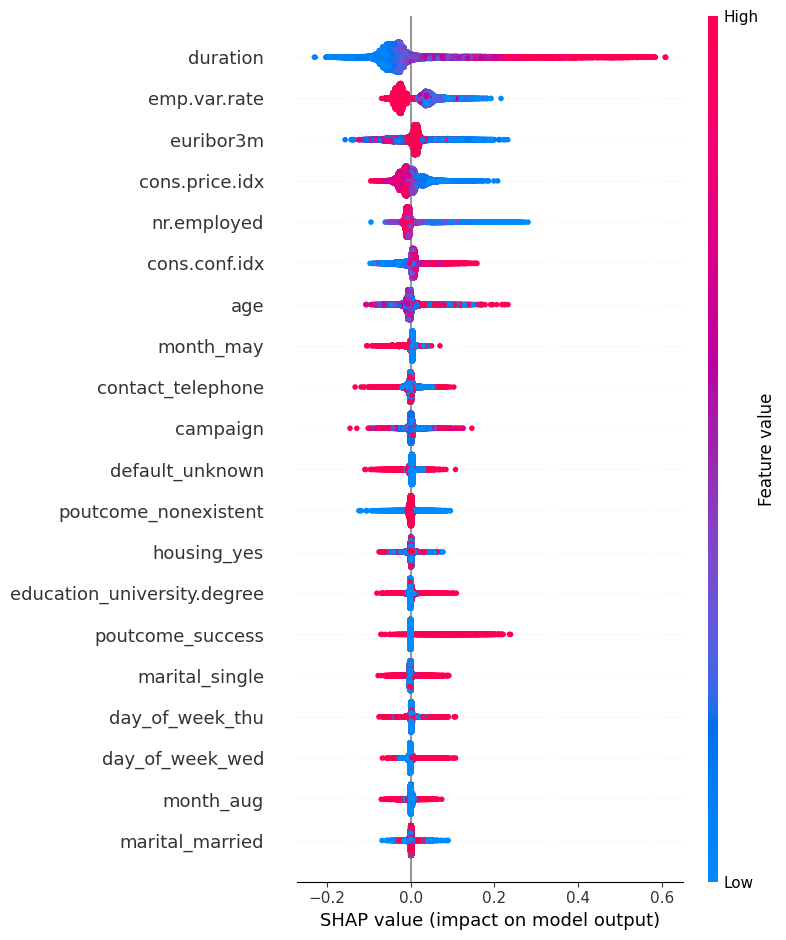

In [ ]:
#shap.Explainer é uma interface genérica e automaticamente escolhe o explainer apropriado com base no modelo
# Se detectar um modelo de árvore → usa TreeExplainer
# Se não detectar corretamente → pode usar KernelExplainer (muito mais lento)

explainer = shap.Explainer(rf, X_train_final)
shap_values = explainer(X_train_final, check_additivity=False)

shap_values_class1 = shap_values.values[:, :, 1]
shap.summary_plot(shap_values_class1, X_train_final)

100%|===================| 65827/65900 [05:20<00:00]       

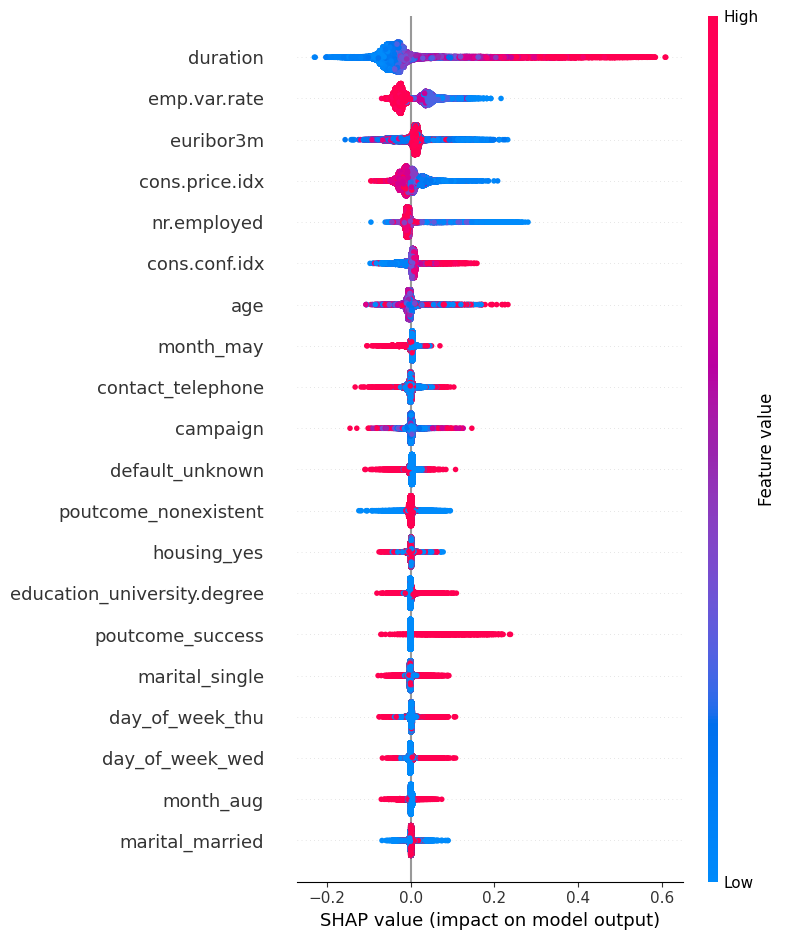

In [ ]:
# Como o modelo utilizado é um modelo de árvore é melhor utilizar direto o TreeExplainer()
# usa algoritmo TreeSHAP, que é mais otimizado e muito mais rápido e preciso para esse tipo de modelo.

explainer = shap.TreeExplainer(rf, X_train_final)
shap_values = explainer(X_train_final, check_additivity=False)

shap_values_class1 = shap_values.values[:, :, 1]
shap.summary_plot(shap_values_class1, X_train_final)

Por padrão, shap.summary_plot() mostra apenas as 20 features com maior importância global.

As features são ordenadas da mais importante para a menos com base na média dos valores absolutos.
O eixo X representa o impacto de uma feature na predição, sendo que:
* quando positivos: aumentam a predição do modelo
* quando negativos: diminuem a predição

Cada ponto no gráfico representa uma instância do conjunto de dados.

A Cor: indica o valor da feature para aquela instância (ex: vermelho para valores altos, azul para valores baixos).


A capacidade de explicar por que um modelo fez uma previsão específica ajuda a depurar possíveis vieses, identificar problemas de dados e justificar as decisões do modelo.